In [2]:
import networkx as nx
import osmnx as ox
import requests
import sys,os,os.path
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ox.config(use_cache=True, log_console=True)
ox.__version__

'0.12.1'

In [4]:
stations = pd.read_csv('../../data/stations.csv')

In [5]:
stations.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort
0,1110101,1110101,函館,NaN,NaN,11101,1,040-0063,北海道函館市若松町１２-１３,140.726413,41.773709,1902-12-10,0000-00-00,0,1110101
1,1110102,1110102,五稜郭,NaN,NaN,11101,1,041-0813,函館市亀田本町,140.733539,41.803557,0000-00-00,0000-00-00,0,1110102
2,1110103,1110103,桔梗,NaN,NaN,11101,1,041-0801,北海道函館市桔梗３丁目４１-３６,140.722952,41.846457,1902-12-10,0000-00-00,0,1110103
3,1110104,1110104,大中山,NaN,NaN,11101,1,041-1121,亀田郡七飯町大字大中山,140.713580,41.864641,0000-00-00,0000-00-00,0,1110104
4,1110105,1110105,七飯,NaN,NaN,11101,1,041-1111,亀田郡七飯町字本町,140.688556,41.886971,0000-00-00,0000-00-00,0,1110105


In [4]:
# 日本語・ローマ字変換ライブラリ `pykakasi` をインストール
!pip install git+https://github.com/miurahr/pykakasi

  Cloning https://github.com/miurahr/pykakasi to /tmp/pip-req-build-ftybbydv
  Running command git clone -q https://github.com/miurahr/pykakasi /tmp/pip-req-build-ftybbydv
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pykakasi: filename=pykakasi-2.0.0-py3-none-any.whl size=1239818 sha256=f271f91e626d0a3165b9e889ec916220afc5a3ea2f8ff24e630068b7091fae6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_cjqlahn/wheels/62/49/c7/6c3498f4d54697dd2876d998349269c7b64871f871ee1180c7
Successfully built pykakasi


In [5]:
from pykakasi import kakasi

kakasi = kakasi()

kakasi.setMode('H', 'a')
kakasi.setMode('K', 'a')
kakasi.setMode('J', 'a')

conv = kakasi.getConverter()

In [6]:
# 駅名のローマ字名を付与
stations['station_name_roman'] = stations['station_name'].apply(lambda name: conv.do(name))
stations

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort,station_name_roman
0,1110101,1110101,函館,NaN,NaN,11101,1,040-0063,北海道函館市若松町１２-１３,140.726413,41.773709,1902-12-10,0000-00-00,0,1110101,hakodate
1,1110102,1110102,五稜郭,NaN,NaN,11101,1,041-0813,函館市亀田本町,140.733539,41.803557,0000-00-00,0000-00-00,0,1110102,goryoukaku
2,1110103,1110103,桔梗,NaN,NaN,11101,1,041-0801,北海道函館市桔梗３丁目４１-３６,140.722952,41.846457,1902-12-10,0000-00-00,0,1110103,kikyou
3,1110104,1110104,大中山,NaN,NaN,11101,1,041-1121,亀田郡七飯町大字大中山,140.713580,41.864641,0000-00-00,0000-00-00,0,1110104,daichuuyama
4,1110105,1110105,七飯,NaN,NaN,11101,1,041-1111,亀田郡七飯町字本町,140.688556,41.886971,0000-00-00,0000-00-00,0,1110105,shichimeshi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10850,9992719,9992719,てだこ浦西,NaN,NaN,99927,47,901-2102,沖縄県浦添市前田三丁目21,127.741861,26.241778,2019-10-01,0000-00-00,0,9992719,tedakouranishi
10851,9992801,1190202,九州鉄道記念館,NaN,NaN,99928,40,800-0000,福岡県北九州市門司区,130.962439,33.944392,0000-00-00,0000-00-00,0,9992801,kyuushuutetsudoukinenkan
10852,9992802,9992802,出光美術館,NaN,NaN,99928,40,800-0000,福岡県北九州市門司区,130.965292,33.947792,0000-00-00,0000-00-00,0,9992802,idemitsubijutsukan
10853,9992803,9992803,ノーフォーク広場,NaN,NaN,99928,40,801-0854,福岡県北九州市門司区旧門司,130.964254,33.955973,0000-00-00,0000-00-00,0,9992803,noofookuhiroba


In [7]:
target_stations = stations[(stations['line_cd'] == 11312) | (stations['line_cd'] == 24001)]

In [8]:
import folium

In [9]:
center_lat, center_lon = (35.651820534474,139.54461236426)

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in target_stations.iterrows():
    color = 'red' if station['line_cd'] == 11312 else 'pink'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [12]:
#駅の800m範囲内のグラフ構造の配列を取得
def get_stats(data):
    wurster_hall = (data['lat'], data['lon'])
    one_mile = 800 #meters
    G = ox.graph_from_point(wurster_hall, distance=one_mile, network_type='drive')

    # what sized area does our network cover in square meters?
    G_proj = ox.project_graph(G)
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    graph_area_m = nodes_proj.unary_union.convex_hull.area
    
    # show some basic stats about the network
    stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
    return pd.Series(stats)
    

In [15]:
#駅の800m範囲内のグラフ構造の配列を取得
stats_list = target_stations.apply(get_stats, axis=1)
stats_list

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
1504,429,807,3.762238,424,3.456876,"{0: 0, 1: 5, 2: 3, 3: 228, 4: 179, 5: 12, 6: 2}","{0: 0.0, 1: 0.011655011655011656, 2: 0.0069930...",60085.171,74.454983,51383.318,74.793767,687,189.776780,187.564929,26579.884081,22730.444358,1.013870,0.001239,241,106.611198
1505,969,1940,4.004128,955,3.349845,"{0: 0, 1: 14, 2: 1, 3: 602, 4: 338, 5: 12, 6: 2}","{0: 0.0, 1: 0.014447884416924664, 2: 0.0010319...",104802.951,54.022140,85753.224,54.759402,1566,401.974424,396.166744,43475.857491,35573.377567,1.010249,0.000515,511,211.980321
1506,1106,2410,4.358047,1077,3.257685,"{0: 0, 1: 29, 2: 0, 3: 743, 4: 326, 5: 7, 6: 1}","{0: 0.0, 1: 0.026220614828209764, 2: 0.0, 3: 0...",111316.182,46.189287,81149.159,46.717996,1737,439.250321,427.732907,44209.465308,32228.566100,1.007648,0.000000,543,215.653638
1507,492,1101,4.475610,412,2.821138,"{0: 0, 1: 80, 2: 1, 3: 338, 4: 73}","{0: 0.0, 1: 0.16260162601626016, 2: 0.00203252...",70296.797,63.848135,43993.603,66.355359,663,202.387111,169.478638,28917.003433,18097.028930,1.041710,0.000000,255,104.895759
1508,712,1614,4.533708,680,3.165730,"{0: 0, 1: 32, 2: 1, 3: 509, 4: 160, 5: 7, 6: 3}","{0: 0.0, 1: 0.0449438202247191, 2: 0.001404494...",88103.221,54.586878,60637.222,56.093637,1081,291.609617,278.503567,36083.913658,24834.827357,1.023062,0.000000,397,162.596935
1509,1109,2706,4.880072,936,2.816952,"{0: 0, 1: 173, 2: 8, 3: 779, 4: 147, 5: 2}","{0: 0.0, 1: 0.15599639314697927, 2: 0.00721370...",126528.104,46.758353,69962.526,46.641684,1500,439.684889,371.095632,50164.558527,27738.021193,1.032749,0.000000,526,208.543058
1510,1331,3355,5.041322,1176,2.915101,"{0: 0, 1: 155, 2: 8, 3: 966, 4: 199, 5: 3}","{0: 0.0, 1: 0.11645379413974455, 2: 0.00601051...",143680.988,42.825928,80573.310,42.972432,1875,530.102628,468.370166,57224.394714,32090.250485,1.020047,0.000000,606,241.354014
1511,1290,3427,5.313178,1148,2.908527,"{0: 0, 1: 142, 2: 4, 3: 978, 4: 162, 5: 4}","{0: 0.0, 1: 0.11007751937984496, 2: 0.00310077...",150776.423,43.996622,79888.309,44.088471,1812,513.751368,457.198892,60047.746952,31816.068240,1.027910,0.000000,571,227.404675
1512,1182,2823,4.776650,1010,2.875635,"{0: 0, 1: 172, 2: 9, 3: 802, 4: 192, 5: 7}","{0: 0.0, 1: 0.1455160744500846, 2: 0.007614213...",132896.563,47.076360,78656.583,47.961331,1640,469.894094,401.516950,52831.903653,31269.258745,1.031086,0.000000,566,225.008509
1513,758,1982,5.229551,711,3.149077,"{0: 0, 1: 47, 2: 4, 3: 496, 4: 211}","{0: 0.0, 1: 0.06200527704485488, 2: 0.00527704...",117491.274,59.279149,67223.799,58.813472,1143,307.149687,288.104785,47608.717679,27239.800531,1.013532,0.000000,498,201.794913


In [16]:
target_stations_with_stats = pd.concat([target_stations, stats_list], axis=1)

In [18]:
target_stations_with_stats.to_csv('../../data/target_stations_with_stats')

In [6]:
target_stations_with_stats = pd.read_csv('../../data/target_stations_with_stats.csv')

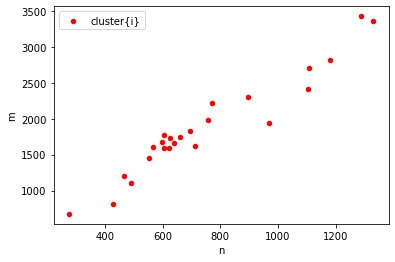

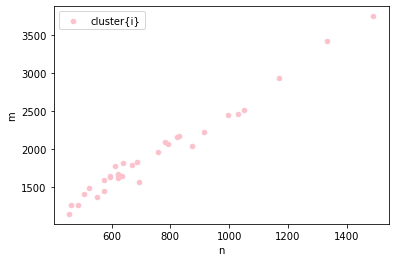

In [8]:
# 路線ごとの交差点数、道路数のグラフ化
ax = None
colors = {11312: 'red', 24001: 'pink'}
for i, station in target_stations_with_stats.groupby('line_cd'):
    station.plot.scatter(x='n', y='m', color=colors[i], label='cluster{i}', ax=ax)

(array([[1., 0., 1., 2., 2., 5., 3., 2., 1., 0., 1., 1., 0., 2., 1., 0.,
         1., 1., 0., 0.],
        [0., 0., 1., 3., 4., 7., 4., 1., 2., 3., 1., 1., 2., 0., 1., 0.,
         0., 1., 0., 1.]]),
 array([ 275.  ,  335.75,  396.5 ,  457.25,  518.  ,  578.75,  639.5 ,
         700.25,  761.  ,  821.75,  882.5 ,  943.25, 1004.  , 1064.75,
        1125.5 , 1186.25, 1247.  , 1307.75, 1368.5 , 1429.25, 1490.  ]),
 <a list of 2 Lists of Patches objects>)

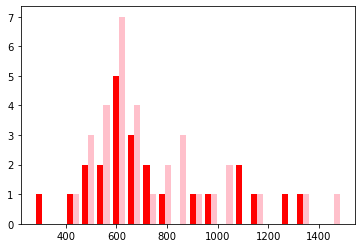

In [25]:
plt.hist([chuo_stations['n'], keio_stations['n']], bins = 20, color=['red', 'pink'])


In [9]:
plt.hist([chuo_stations['m'], keio_stations['m']], bins = 20, color=['red', 'pink'])


NameError: name 'chuo_stations' is not defined

In [26]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
stations_sub = target_stations_with_stats[['n','m','k_avg']]

# 標準化
sc = StandardScaler()
sc.fit(stations_sub)
stations_sub_std = sc.transform(stations_sub)

0    41
1    15
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

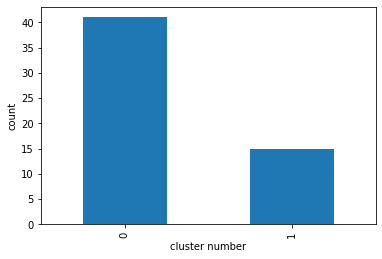

In [37]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=2, random_state=0)

# クラスターの重心を計算
kmeans.fit(stations_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number', index=target_stations_with_stats.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

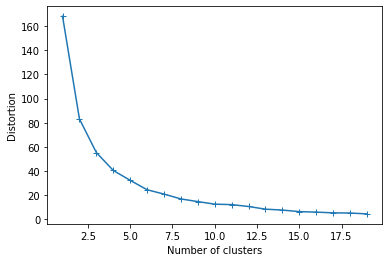

In [28]:
# エルボー方による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(stations_sub_std)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [39]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([target_stations_with_stats, pd.Series(labels, index=target_stations_with_stats.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,cluster_number
1504,1131201,1130101,東京,NaN,NaN,11312,13,100-0005,東京都千代田区丸の内一丁目,139.766103,...,687,189.776780,187.564929,26579.884081,22730.444358,1.013870,0.001239,241,106.611198,0
1505,1131202,1130223,神田,NaN,NaN,11312,13,101-0044,東京都千代田区鍛冶町二丁目13-1,139.770641,...,1566,401.974424,396.166744,43475.857491,35573.377567,1.010249,0.000515,511,211.980321,1
1506,1131203,1131203,御茶ノ水,NaN,NaN,11312,13,101-0062,千代田区神田駿河台２丁目,139.764955,...,1737,439.250321,427.732907,44209.465308,32228.566100,1.007648,0.000000,543,215.653638,1
1507,1131207,1131102,四ツ谷,NaN,NaN,11312,13,160-0004,東京都新宿区四谷一丁目,139.730644,...,663,202.387111,169.478638,28917.003433,18097.028930,1.041710,0.000000,255,104.895759,0
1508,1131211,1130208,新宿,NaN,NaN,11312,13,160-0022,東京都新宿区新宿三丁目38-1,139.700464,...,1081,291.609617,278.503567,36083.913658,24834.827357,1.023062,0.000000,397,162.596935,0


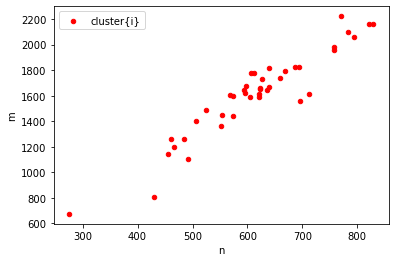

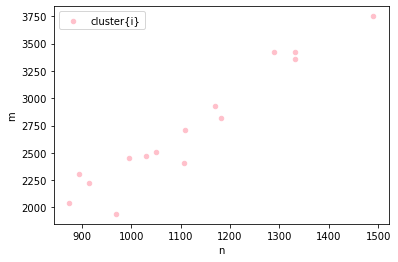

In [54]:
stations_0 = stations_with_cluster[stations_with_cluster['cluster_number'] == 0]
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink']
for i, station in stations_with_cluster.groupby('cluster_number'):
    station.plot.scatter(x='n', y='m', color=colors[i], label='cluster{i}', ax=ax)

In [40]:
# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_line_cd = stations_with_cluster.groupby(['cluster_number', 'line_cd']).size().unstack().fillna(0)
cross_cluster_line_cd

line_cd,11312,24001
cluster_number,,
0,17,24
1,7,8


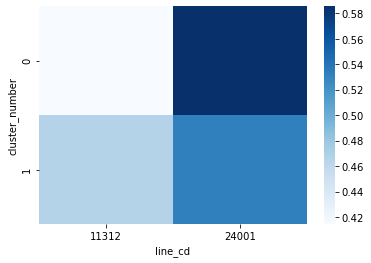

In [43]:
sns.heatmap(cross_cluster_line_cd.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [75]:
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 0)])

['東京', '四ツ谷', '新宿', '西荻窪', '吉祥寺', '三鷹', '武蔵境', '東小金井', '国分寺', '西国分寺', '国立', '立川', '日野', '豊田', '八王子', '西八王子', '高尾', '新宿', '千歳烏山', '仙川', 'つつじヶ丘', '柴崎', '国領', '布田', '調布', '西調布', '飛田給', '武蔵野台', '多磨霊園', '東府中', '府中', '分倍河原', '中河原', '聖蹟桜ヶ丘', '百草園', '高幡不動', '南平', '平山城址公園', '長沼', '北野', '京王八王子']


In [76]:
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 1)])

['神田', '御茶ノ水', '中野', '高円寺', '阿佐ケ谷', '荻窪', '武蔵小金井', '笹塚', '代田橋', '明大前', '下高井戸', '桜上水', '上北沢', '八幡山', '芦花公園']
